In [2]:
import pandas as pd
cust_df = pd.read_csv('data_1024.csv', sep='\t')
cust_df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


In [3]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
Driver_ID           4000 non-null int64
Distance_Feature    4000 non-null float64
Speeding_Feature    4000 non-null float64
dtypes: float64(2), int64(1)
memory usage: 93.8 KB


In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler
X = cust_df.values[:,1:]
X = np.nan_to_num(X)
clus_dataset = StandardScaler().fit_transform(X)
clus_dataset

array([[-0.0898104 ,  1.26061251],
       [-0.43977285,  1.04174351],
       [-0.215131  ,  1.18765617],
       ...,
       [ 1.77447381,  0.09331115],
       [ 1.87229869, -0.41738319],
       [ 1.72060465, -0.12555785]])

In [7]:
from sklearn.cluster import KMeans
clusternum = 4
k_means = KMeans(init="k-means++", n_clusters=clusternum, n_init=12)
k_means.fit(clus_dataset)
lables = k_means.labels_
print(lables)

[3 3 3 ... 0 0 0]


In [8]:
cust_df['Clus_km']=lables
cust_df.head(5)

,Driver_ID,Distance_Feature,Speeding_Feature,Clus_km
0,3423311935,71.24,28.0,3
1,3423313212,52.53,25.0,3
2,3423313724,64.54,27.0,3
3,3423311373,55.69,22.0,3
4,3423310999,54.58,25.0,3


In [10]:
cust_df.groupby('Clus_km').mean()

,Driver_ID,Distance_Feature,Speeding_Feature
Clus_km,,,
0,3.423312e+09,180.434863,10.529496
1,3.423312e+09,50.016637,5.204037
2,3.423313e+09,177.835096,70.288462
3,3.423312e+09,50.404824,32.365340


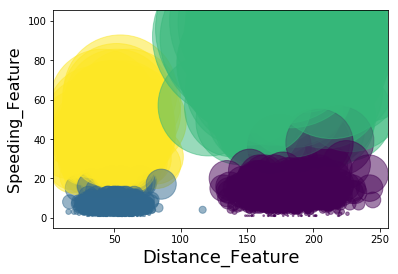

In [14]:
import matplotlib.pyplot as plt
area = np.pi * (X[:,1])**2
plt.scatter(X[:,0],X[:,1], s=area, c=lables.astype(np.float), alpha=0.5)
plt.xlabel('Distance_Feature', fontsize=18)
plt.ylabel('Speeding_Feature', fontsize=16)

plt.show()